# Customer Churn Prediction Model

#### Customer churn is the phenomenon in which a client stops doing business with an entity. Users can stop using a company’s product or service for a variety of reasons, such as affordability, dissatisfaction with the offering, and bad customer service.

### In this we build a customer churn prediction model in python using the random forest algorithm. 

#### Table of contents:  
┈➤ Reviewing the Dataset
┈➤ Exploratory Data Analysis for Customer Churn Prediction
┈➤ Preprocessing Data for Customer Churn
┈➤ Building the Customer Churn Prediction Model
┈➤ Customer Churn Prediction Model Evaluation
┈➤ Build a Customer Churn Model in Python

### Reviewing the Dataset 

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\bobby\Desktop\Technohacks Data Science Internship\Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Let's count the number of customers in the dataset who have churned:

df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Exploratory Data Analysis for Customer Churn Prediction 

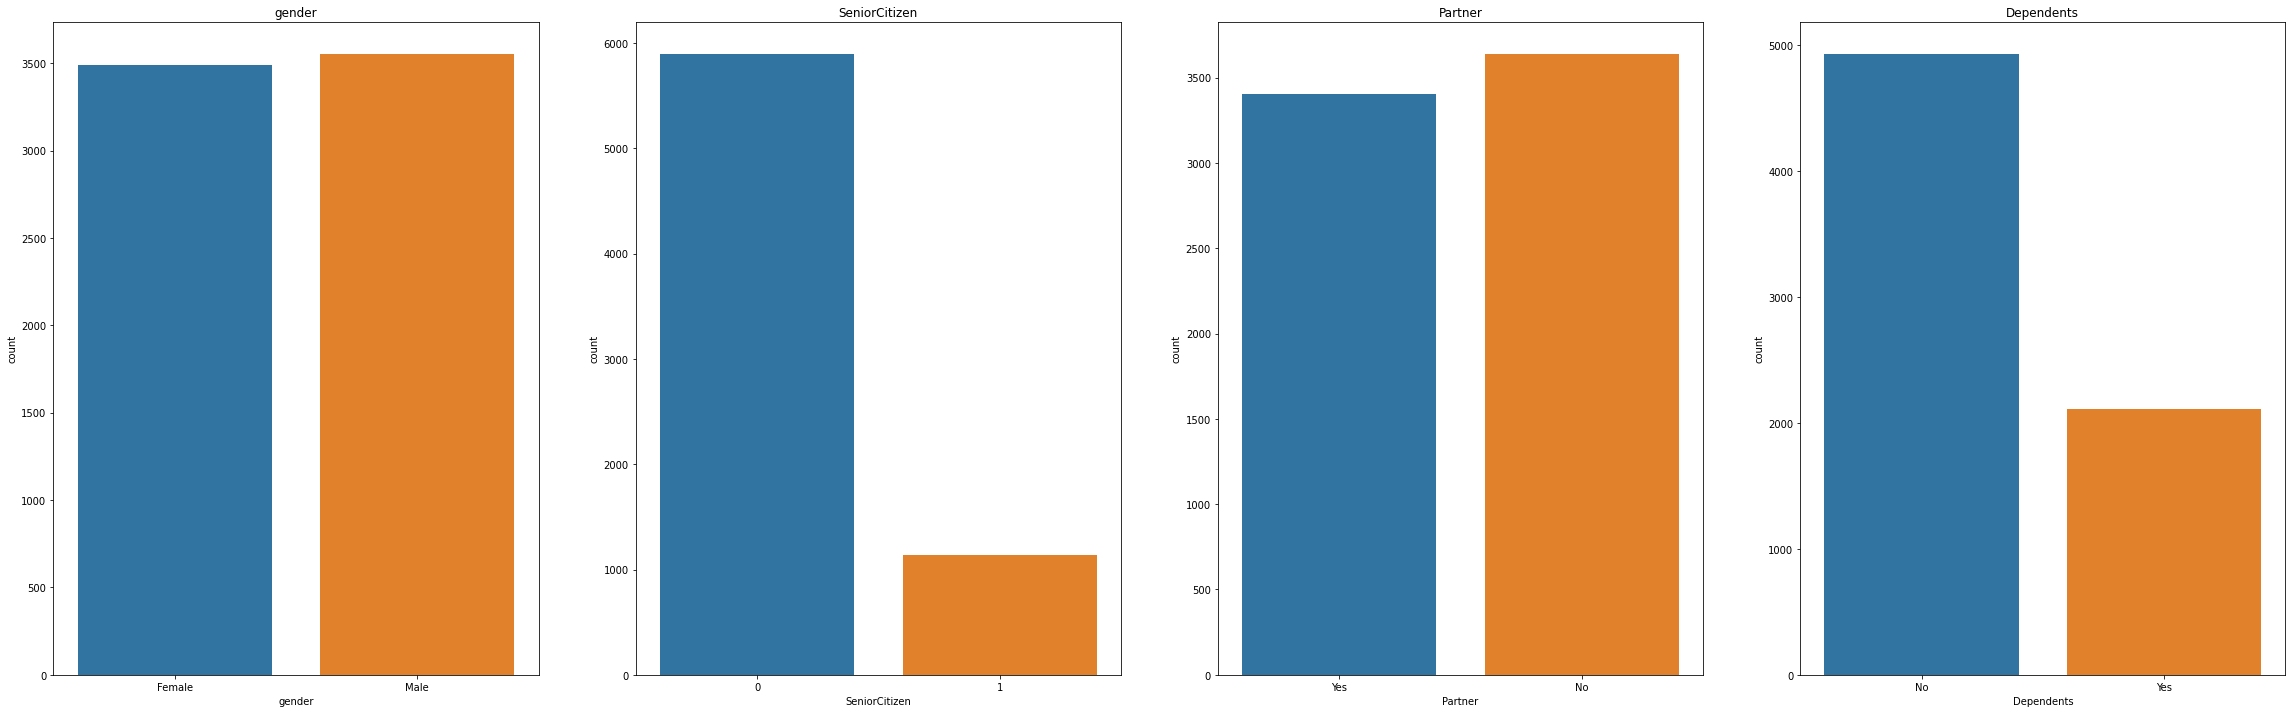

In [8]:
# Now, let's perform some exploratory data analysis to gain a better understanding of the independent variables in the 
# dataset and their relationship with customer churn.

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(40,12))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

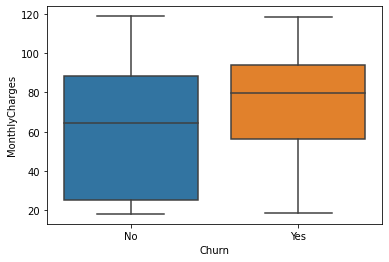

In [10]:
# Most customers in the dataset are younger individuals without a dependent. There is an equal distribution of user 
# gender and marital status.
# Now, let’s look into the relationship between cost and customer churn. 
# In the real world, users tend to unsubscribe to their mobile service provider and 
# switch to a different brand if they find the monthly subscription cost too high. 
# Let’s check if that behavior is reflected in our dataset:

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

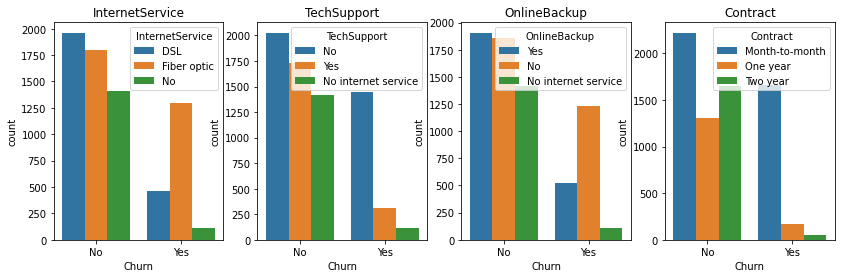

In [11]:
# The assumption above is true. Customers who churned have a higher median monthly charge than customers who renewed their subscription.

# Finally, let’s analyze the relationship between customer churn and 
# a few other categorical variables captured in the dataset:

cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

### Preprocessing Data for Customer Churn 

In [12]:
# Now that we have a better understanding of our dataset, 
# let's perform some data preparation before creating the machine learning model.

In [13]:
# Cleaning the dataset

df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [14]:
# Encoding Categorical Variables

cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [15]:
# Now, let's take a look at the dataset after encoding these categorical variables:

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [16]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

In [17]:
# Oversampling

from sklearn.model_selection import train_test_split
finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerID'],axis=1)
X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# Now, let's oversampling the traning dataset

from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [20]:
# Let's check the number of samples in each to ensure that they are equal:

y_train.value_counts()

0    3452
1    3452
Name: Churn, dtype: int64

### Building the customer Churn Prediction Model

In [21]:
# We now build a random forest classifier to predict customer churn:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

### Customer Churn Prediction Model Evaluation 

In [24]:
# Let's evaluate the model predictions on the test dataset:\

from sklearn.metrics import accuracy_score
preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7694959069366653


### Our model is performing well, with an accuracy of approx 0.76 on the test dataset.
